# Case Study on Unsupervised Learning

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the dataset to the python environment

In [3]:
df = pd.read_csv('Wine.csv')

In [4]:
df.shape

(178, 13)

In [5]:
df.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [6]:
df.tail(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Insights:

* Dataset doesn't have any null values.
* Dataset doesn't appears to be having any target variables, so is fit for proceeding.

### 2&3. Clustering models in the wine dataset;Finding the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [10]:
#KMeans
#preparing data
x = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

from sklearn.cluster import KMeans

In [11]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17592296.383508474
4543749.614531863
2370689.6867829696
1331903.0622637176
916379.1871539167
647326.0020260852
412137.5091004584
324523.6250001953
270954.9292415374
217887.3785603329


Text(0, 0.5, 'WCSS')

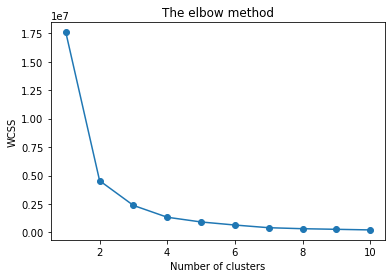

In [12]:
plt.plot(range(1, 11), wcss,'-o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
#elbow plotting
#no. of clusters=3

kmeans_cluster = KMeans(n_clusters=3)
kmeans_model = kmeans_cluster.fit(x)
kmeans_pred = kmeans_model.labels_
kmeans_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2])

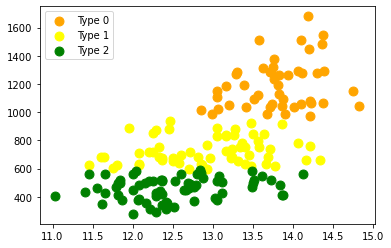

In [17]:
#Kmeans clustering plot

plt.scatter(x[kmeans_pred == 0, 0], x[kmeans_pred == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(x[kmeans_pred == 1, 0], x[kmeans_pred == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(x[kmeans_pred == 2, 0], x[kmeans_pred == 2, 12], s = 80, c = 'green', label = 'Type 2')
plt.legend()
#value labels from above output

In [18]:
#standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.pipeline import make_pipeline

In [19]:
pipe = make_pipeline(scaler,kmeans_model)
pipe.fit(x)
labels_standard_scale = pipe.predict(x)
print(labels_standard_scale)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
#Normalisation
from sklearn.preprocessing import Normalizer
normal = Normalizer()
pipe_ = make_pipeline(normal,kmeans_model)
pipe_.fit(x)
labels_no = pipe_.predict(x)
print(labels_no)

[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 1 1 0 0 0 0 1 2 1 0 0
 2 1 1 1 0 1 1 2 0 0 0 1 0 0 2 2 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0
 0 1 1 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


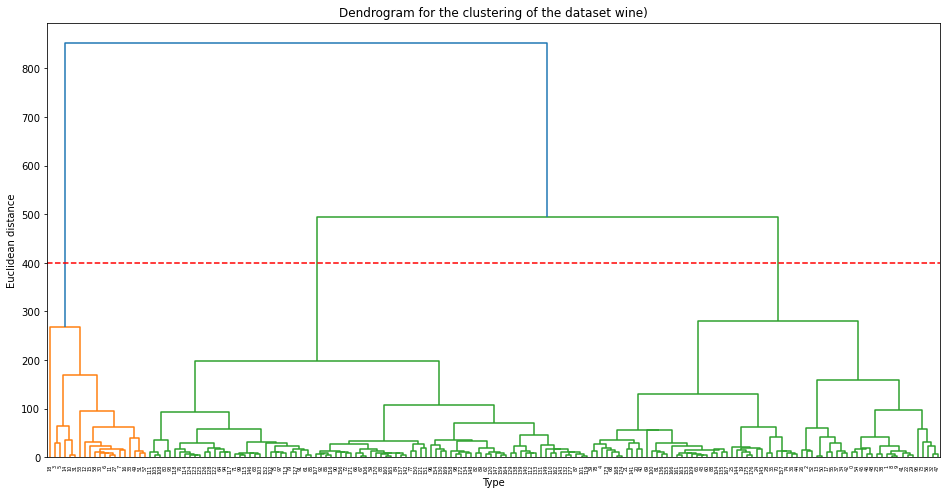

In [23]:
#HCA

# Plotting of Dendrogram
import scipy.cluster.hierarchy as sch
Z = sch.linkage(x, method = 'median')
plt.figure(figsize=(16,8))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset wine)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance')
plt.hlines(400,0,5000,colors="r",linestyles="dashed")
plt.show()

In [24]:
#Decided that number of clusters be 3 from above dendrogram

# Building an Agglomerative Clustering Model
from sklearn.cluster import AgglomerativeClustering

In [25]:
#Initialise Model
cluster_H = AgglomerativeClustering(n_clusters=3)

In [27]:
model_cls = cluster_H.fit(x)#modelling
model_cls

AgglomerativeClustering(n_clusters=3)

In [28]:
pred1 = model_cls.labels_
pred1

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

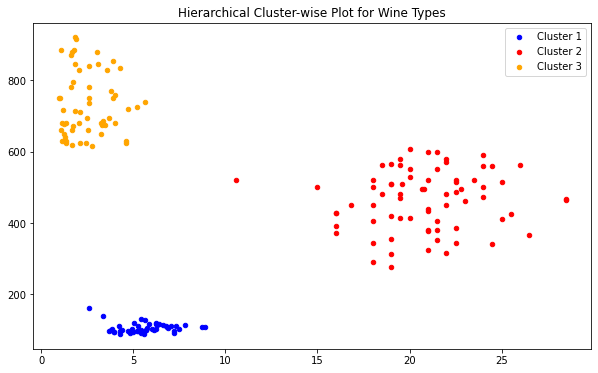

In [29]:
#HCA plot

plt.figure(figsize=(10,6))
plt.scatter(x[pred1 == 0, 9], x[pred1 == 0, 4], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(x[pred1 == 1, 3], x[pred1 == 1, 12], s = 20, c = 'red', label = 'Cluster 2')
plt.scatter(x[pred1 == 2, 1], x[pred1 == 2, 12], s = 20, c = 'orange', label = 'Cluster 3')
plt.title('Hierarchical Cluster-wise Plot for Wine Types')
plt.legend()